# Energietransport im Klimasystem

Um Energietransport in der Atmosphäre und im Ozean anzuschauen werden wir Reanalysedaten verwenden. Reanalysen versuchen numerische Wettervorhersagemodelle und Beobachtungen mit Methoden der Datenassimilisierung (vereinfacht gesagt, einer umfangreichen statistischen Werkzeugkiste) zu kombinieren, um eine in sich schlüssige Zustandsbeschreibung der Atmosphäre zu erhalten. Wir verwenden hier Reanalysedaten des Europäischen Zentrums für mittelfristige Wettervorhersage ([ECMWF](https://www.ecmwf.int/)).

In [1]:
#Importieren der erforderlichen Pakete
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs

## Jetstreams

Jetstreams sind Starkwindbänder in der oberen Troposphäre, teilweise auch in der unteren Stratosphäre, die durch starke horizontale Temperaturgradienten angetrieben. Sie sind in der regel an bestimmte Wetterlagen, bestimmte Regionen und/oder bestimmte Jahreszeiten gebunden. Jetstreams treten in den Äquatorgebieten, den Subtropen, den mittleren Breiten und in Polarregionen auf. Der Polarfrontjetstream in den mittleren Breiten tritt in der Regel gemeinsam mit der Polarfront auf. Für nähere Details siehe die Lehrbücher von Kraus (2000) und/oder Liljequist und Cehak (1979). In der Wettervorhersage wird häufig das Horizontalwindfeld auf der 250 hPa Druckfläche genutzt, um die Lage der Jetstreams abzuschätzen.

In [115]:
#Laden des Reanalysedatensatzes
ds = nc.Dataset("horizontal_wind_vector_components_2018-03-28_12UTC_250hpa.nc")
#Ausschreben der Kopfzeilen der beiden Variablen
print(ds["u"])
print(ds["v"])

<class 'netCDF4._netCDF4.Variable'>
int16 u(time, latitude, longitude)
    scale_factor: 0.0017360945535073932
    add_offset: 25.36183336873887
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: U component of wind
    standard_name: eastward_wind
unlimited dimensions: 
current shape = (1, 721, 1440)
filling on
<class 'netCDF4._netCDF4.Variable'>
int16 v(time, latitude, longitude)
    scale_factor: 0.0018604653380739475
    add_offset: 0.26240594897158803
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: V component of wind
    standard_name: northward_wind
unlimited dimensions: 
current shape = (1, 721, 1440)
filling on


In [118]:
#Laden der Datensatzvariablen
u = ds["u"][:]
v = ds["v"][:]
#Laden der geographischen Variablen
lat = ds["latitude"][:]
lon = ds["longitude"][:]
#Konvertieren der Variablen
#der Vorgang lässt sich automatisieren und Pakete wie xarray skalieren automatisch
u = 0.0017360945535073932*u+25.36183336873887
v = 0.0018604653380739475*v+0.26240594897158803
horizontal_wind_speed = np.sqrt(u**2+v**2)


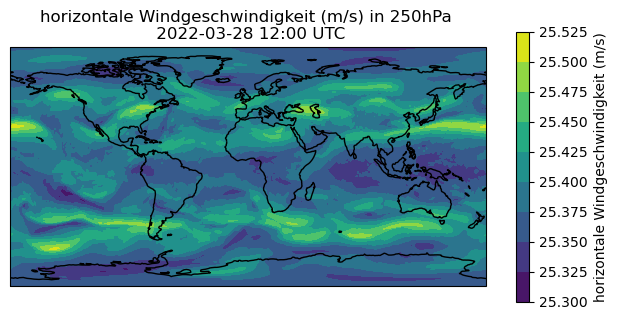

In [119]:
#Erstellen eines Gitternetzes zur Darstellung der Resultate
lons, lats = np.meshgrid(lon, lat)
#Vorbereiten des Plots und hinzufügen der Küstenlinien
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#eigentliche Plot
cm = ax.contourf(lons,lats,horizontal_wind_speed[0,:,:])
#Hinzufügen von Farbskala und Titel
cbar = plt.colorbar(cm, shrink=0.6)
cbar.ax.set_ylabel("horizontale Windgeschwindigkeit (m/s)")
ax.set_title("horizontale Windgeschwindigkeit (m/s) in 250hPa \n 2022-03-28 12:00 UTC")
plt.tight_layout()


## Meeresoberflächentemperatur

Meeresströmungen sind ein weiterer wichtiger Baustein für den Energietransport im Klimasystem. Hier betrachten wir die Meeresoberflächentemperatur, um den Golfstrom/Nordatlantikstrom als wichtigen Faktor für Europas Klima in den Daten zu identifizieren.

Zunächst betrachten wir Reanalysen des ECMWF. Im Gegensatz zu Atmosphärendaten, die mit einer zeitlichen Auflösung von einer Stunde vorliegen, verfügen Ozeandaten über eine monatliche Auflösung. Die Analyse der Ozeandaten stellt eine wichtige Anfangsbedingung in den Wettervorhersagemodellen dar, insbesondere für die saisonale Vorhersage. (Nebenbemerkung: Wir verwenden hier eine etwas gröbere horizontale Auflösung, als um ECMWF zur Verfügung gestellt.)

In [124]:
ds = nc.Dataset("sosstsst_ORAS5_1m_201807_r1x1.nc")
print(ds["sosstsst"])

<class 'netCDF4._netCDF4.Variable'>
float32 sosstsst(time_counter, lat, lon)
    standard_name: Sea Surface temperature
    long_name: Sea Surface temperature
    units: C
    _FillValue: 9.96921e+36
    missing_value: 9.96921e+36
    online_operation: ave(x)
    interval_operation: 1200.0
    interval_write: 2678400.0
    offline_operation: ave(x)
unlimited dimensions: time_counter
current shape = (1, 180, 360)
filling on


In [126]:
sst = ds["sosstsst"][:]
lat = ds["lat"][:]
lon = ds["lon"][:]

Text(0.5, 1.0, 'Meeresoberflächentemperatur\nJuli 2018')

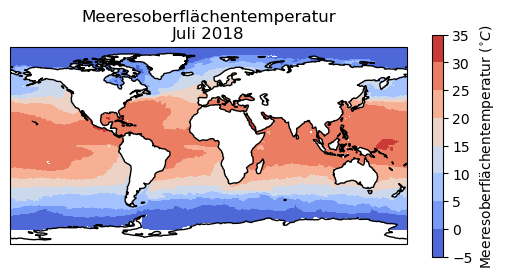

In [130]:
#Erstellen eines Gitternetzes zur Darstellung der Resultate
lons, lats = np.meshgrid(lon, lat)
#Vorbereiten des Plots und hinzufügen der Küstenlinien
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#eigentliche Plot
cm = ax.contourf(lons,lats,sst[0,:,:], cmap="coolwarm")
cbar = plt.colorbar(cm, shrink=0.6)
cbar.ax.set_ylabel(r"Meeresoberflächentemperatur ($^{\circ}C}$)")
ax.set_title("Meeresoberflächentemperatur\nJuli 2018")

Eine höhere zeitliche Auflösung der Meeresoberflächentemperatur können wir erhalten, in dem wir Satellitendaten verwenden. Hier verwenden wir Daten des Advanced Very High Resolution Radiometers (AVHRR), einem Sensor auf Satelliten der Nationale Ozean- und Atmosphärenbehörde der USA ([NOAA](https://www.noaa.gov/)) und der Europäische Organisation für die Nutzung meteorologischer Satelliten ([EUMETSAT](https://www.eumetsat.int/)). Die Daten haben einen zeitliche Auflösung von einem Tag und kombinieren die Satellitenmessungen durch ein Verfahren namens Optimal Interpolation.

In [132]:
ds = nc.Dataset("oisst-avhrr-v02r01.20220901.nc")
sst = ds["sst"][:]
lat = ds["lat"][:]
lon = ds["lon"][:]
lons, lats = np.meshgrid(lon, lat)

Text(0.5, 1.0, 'Meeresoberflächentemperatur\n 1. September 2022')

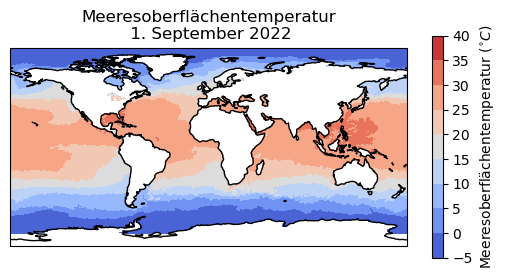

In [134]:
#Vorbereiten des Plots und hinzufügen der Küstenlinien
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#eigentliche Plot
cm = ax.contourf(lons,lats,sst[0,0,:,:], cmap="coolwarm")
cbar = plt.colorbar(cm, shrink=0.6)
cbar.ax.set_ylabel(r"Meeresoberflächentemperatur ($^{\circ}C}$)")
ax.set_title("Meeresoberflächentemperatur\n 1. September 2022")

Text(0.5, 1.0, 'Meeresoberflächentemperatur\n 1. September 2022')

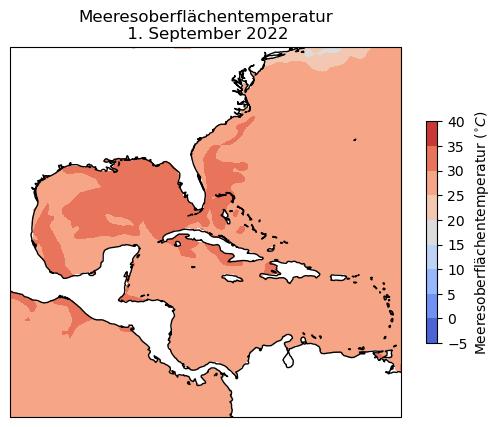

In [136]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#Eingrezung des dargestellten Gebiets
ax.set_extent([-100, -60, 4, 40])
#eigentliche Plot
cm = ax.contourf(lons,lats,sst[0,0,:,:], cmap="coolwarm")
cbar = plt.colorbar(cm, shrink=0.6)
cbar.ax.set_ylabel(r"Meeresoberflächentemperatur ($^{\circ}C}$)")
ax.set_title("Meeresoberflächentemperatur\n 1. September 2022")